In [18]:
import uproot 
import numpy as np
import coffea
from coffea.nanoaod import NanoEvents
from coffea import hist
from coffea.nanoaod.methods.leptons import *

fname = "/uscms/home/therwig/nobackup/public/forDominic/CRAB3_sos_28may2020_testHinoProd_nano.root"
events = NanoEvents.from_file(fname,methods={"ElectronBPark":Electron})

#select electrons and postirons from gen partcles
mask_genele = abs(events.GenPart.pdgId)==11
#Boson as parent
mask_Z_parent = events.GenPart.parent.pdgId == 23
#Neturalino
mask_N_parent = events.GenPart.parent.pdgId == 1000023
#final mask
mask_ele=mask_genele & (mask_Z_parent | mask_N_parent)

#determine delta_R for pairs of electrons
gen_reco_pairs = events.Electron.cross(events.GenPart[mask_ele], nested=True)
gen_reco_deltar = gen_reco_pairs.i0.delta_r(gen_reco_pairs.i1).min()
#match accordingly
mask_matched = gen_reco_deltar<0.05
mask_unmatched = gen_reco_deltar>=0.05

#delta_R for soft_gen_reco pairs
soft_gen_reco_pairs = events.ElectronBPark.cross(events.GenPart[mask_ele], nested=True)
soft_gen_reco_deltar = soft_gen_reco_pairs.i0.delta_r(soft_gen_reco_pairs.i1).min()

soft_mask_matched = soft_gen_reco_deltar<0.05
soft_mask_unmatched = soft_gen_reco_deltar>=0.05

#masks for various cuts
mask_looseMVA = events.ElectronBPark.mvaId > 0
mask_tightMVA = events.ElectronBPark.mvaId > 5
mask_ip3d = events.ElectronBPark.ip3d < 5
mask_trkRelIso = events.ElectronBPark.trkRelIso < 0.3
mask_dxy = np.abs(events.ElectronBPark.dxy) < 0.1
mask_dz = np.abs(events.ElectronBPark.dz) < 15
mask_presel = mask_dxy & mask_dz & mask_ip3d & mask_trkRelIso & (events.ElectronBPark.mvaId>-1) & (events.ElectronBPark.ptBiased>-1)

# reco_cuts["all"] = (reco_electrons.pt > pt_reco_lo) & (reco_electrons.pt < pt_reco_hi) 
#     reco_cuts["presel"] = (reco_cuts["all"] & 
#                            (np.abs(reco_electrons.dxy)< 0.1 ) & (np.abs(reco_electrons.dz) < 15 ) & 
#                            (reco_electrons.ip3d < 5 ) & (reco_electrons.trkRelIso < 2 ) &
#                            (reco_electrons.mvaId>-1) & (reco_electrons.ptBiased>-1)
#                           )
histo_all = hist.Hist(
            "All",
            hist.Cat("variables", "Variables"),
            hist.Bin("soft_ele", "Soft_ele_pt", 50, 0, 20),
        )

histo_all.fill(variables="denominator", soft_ele = events.ElectronBPark[soft_mask_matched].pt.flatten())



/uscms/home/tamasan/miniconda3/envs/FireHydrant/lib/python3.8/site-packages/coffea/hist/plot.py:355: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


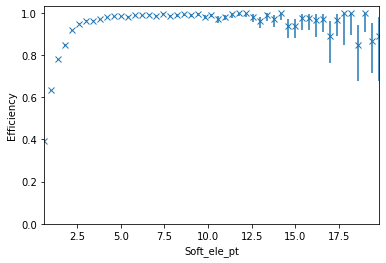

In [19]:
histo_loose = hist.Hist(
            "Efficiency",
            hist.Cat("variables", "Variables"),
            hist.Bin("soft_ele", "Soft_ele_pt", 50, 0, 20),
        )
mask_loose = soft_mask_matched & mask_looseMVA
histo_loose.fill(variables="looseMVA", soft_ele = events.ElectronBPark[mask_loose].pt.flatten())
%matplotlib inline
hist.plotratio(num=histo_loose.integrate("variables"), denom=histo_all.integrate("variables"), error_opts={"marker": "x"})

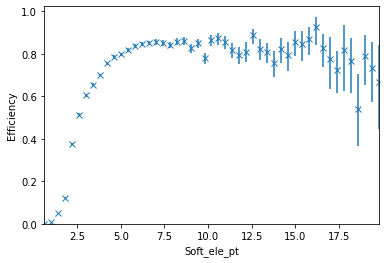

In [20]:
histo_tight = hist.Hist(
            "Efficiency",
            hist.Cat("variables", "Variables"),
            hist.Bin("soft_ele", "Soft_ele_pt", 50, 0, 20),
        )
mask_tight = soft_mask_matched & mask_tightMVA
histo_tight.fill(variables="tightMVA", soft_ele = events.ElectronBPark[mask_tight].pt.flatten())
%matplotlib inline
hist.plotratio(num=histo_tight.integrate("variables"), denom=histo_all.integrate("variables"), error_opts={"marker": "x"})

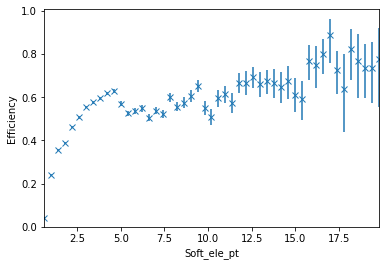

In [29]:
histo_ip3d = hist.Hist(
            "Efficiency",
            hist.Cat("variables", "Variables"),
            hist.Bin("soft_ele", "Soft_ele_pt", 50, 0, 20),
        )
mask_ip3d_ = soft_mask_matched & (events.ElectronBPark.ip3d<2) &mask_presel
histo_ip3d.fill(variables="ip3d", soft_ele = events.ElectronBPark[mask_ip3d_].pt.flatten())
%matplotlib inline
hist.plotratio(num=histo_ip3d.integrate("variables"), denom=histo_all.integrate("variables"), error_opts={"marker": "x"})

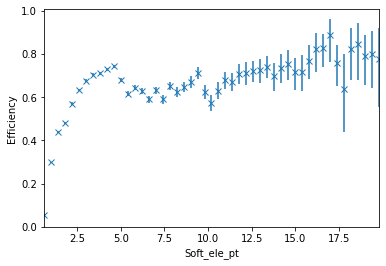

In [30]:
histo_trkRelIso = hist.Hist(
            "Efficiency",
            hist.Cat("variables", "Variables"),
            hist.Bin("soft_ele", "Soft_ele_pt", 50, 0, 20),
        )
mask_trkRelIso_ = soft_mask_matched & mask_presel & (events.ElectronBPark.trkRelIso < 0.3)
histo_trkRelIso.fill(variables="trkRelIso", soft_ele = events.ElectronBPark[mask_trkRelIso_].pt.flatten())
%matplotlib inline
hist.plotratio(num=histo_trkRelIso.integrate("variables"), denom=histo_all.integrate("variables"), error_opts={"marker": "x"})

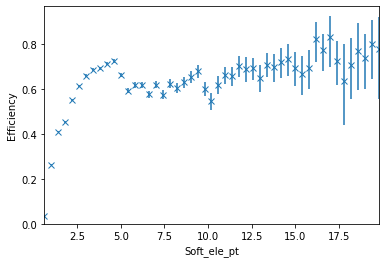

In [31]:
histo_dxy = hist.Hist(
            "Efficiency",
            hist.Cat("variables", "Variables"),
            hist.Bin("soft_ele", "Soft_ele_pt", 50, 0, 20),
        )
mask_dxy_ = soft_mask_matched & mask_presel & (np.abs(events.ElectronBPark.dxy)<0.025)
histo_dxy.fill(variables="dxy", soft_ele = events.ElectronBPark[mask_dxy_].pt.flatten())
%matplotlib inline
hist.plotratio(num=histo_dxy.integrate("variables"), denom=histo_all.integrate("variables"), error_opts={"marker": "x"})

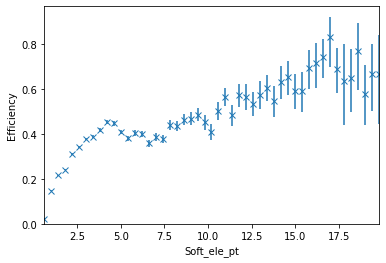

In [32]:
histo_dz = hist.Hist(
            "Efficiency",
            hist.Cat("variables", "Variables"),
            hist.Bin("soft_ele", "Soft_ele_pt", 50, 0, 20),
        )
mask_dz_ = soft_mask_matched & mask_presel & (np.abs(events.ElectronBPark.dz)<0.1)
histo_dz.fill(variables="dz", soft_ele = events.ElectronBPark[mask_dz_].pt.flatten())
%matplotlib inline
hist.plotratio(num=histo_dz.integrate("variables"), denom=histo_all.integrate("variables"), error_opts={"marker": "x"})

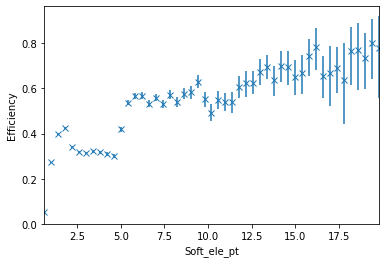

In [35]:
histo_fBrem = hist.Hist(
            "Efficiency",
            hist.Cat("variables", "Variables"),
            hist.Bin("soft_ele", "Soft_ele_pt", 50, 0, 20),
        )
mask_fBrem_ = soft_mask_matched & mask_presel & (events.ElectronBPark.fBrem>0.05)
histo_fBrem.fill(variables="fBrem", soft_ele = events.ElectronBPark[mask_fBrem_].pt.flatten())
%matplotlib inline
hist.plotratio(num=histo_fBrem.integrate("variables"), denom=histo_all.integrate("variables"), error_opts={"marker": "x"})

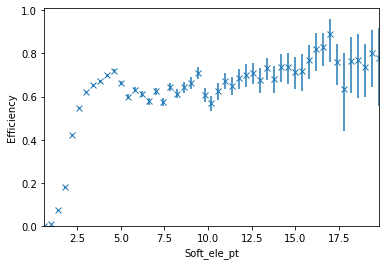

In [36]:
histo_ptBiased = hist.Hist(
            "Efficiency",
            hist.Cat("variables", "Variables"),
            hist.Bin("soft_ele", "Soft_ele_pt", 50, 0, 20),
        )
mask_ptBiased_ = soft_mask_matched & mask_presel & (events.ElectronBPark.ptBiased>2.5)
histo_ptBiased.fill(variables="ptBiased", soft_ele = events.ElectronBPark[mask_ptBiased_].pt.flatten())
%matplotlib inline
hist.plotratio(num=histo_ptBiased.integrate("variables"), denom=histo_all.integrate("variables"), error_opts={"marker": "x"})

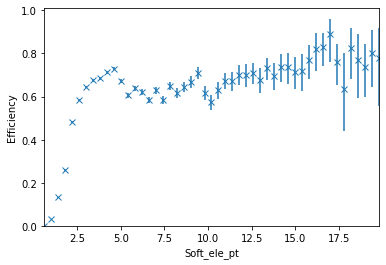

In [44]:
histo_unBiased = hist.Hist(
            "Efficiency",
            hist.Cat("variables", "Variables"),
            hist.Bin("soft_ele", "Soft_ele_pt", 50, 0, 20),
        )
mask_unBiased_ = soft_mask_matched & mask_presel & (events.ElectronBPark.unBiased>2.5)
histo_unBiased.fill(variables="unBiased", soft_ele = events.ElectronBPark[mask_unBiased_].pt.flatten())
%matplotlib inline
hist.plotratio(num=histo_unBiased.integrate("variables"), denom=histo_all.integrate("variables"), error_opts={"marker": "x"})

In [42]:
events.ElectronBPark.ptBiased>2.5

<JaggedArray [[False False False ... False False False] [False False False ... False False False] [False True False ... False False False] ... [False False False ... False False False] [False False False ... False False False] [False False False ... False False False]] at 0x7fd2a8998be0>

In [41]:
events.ElectronBPark.unBiased>2.5

<JaggedArray [[False False False ... False False False] [False False True ... False False False] [False True False ... False False False] ... [False False False ... False False False] [False False False ... False False False] [False False False ... False False False]] at 0x7fd2a8e696d0>